# REDES NEURONALES CONVOLUCIONALES

## Tensores
- Dato multidimensional (escalar, vector, matriz, tensor)

<img src="img/tensors.jpeg" width="600">

<img src="img/3d_tensor.png" width="700">

- Deep learning consiste en una serie de transformaciones (operaciones matemáticas con tensores) del input para dar output. 

<img src="img/sheet_transformacion.png" width="400">

 - Operacion mas importante: tensor dot (matmul)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(256,)), # input 2D tensor con dimensiones 256,ANY. La sintaxis (256,) indica tuple con solo un numero
    tf.keras.layers.Dense(64, ),  # output 1D tensor con dimensiones (64)
    tf.keras.layers.Dense(32, )   # (input asumido de la capa anterior) output 1D tensor con dimension (32)
])

2025-03-06 19:09:36.317152: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 19:09:36.551035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741288176.630300   23024 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741288176.652467   23024 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 19:09:36.843409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# mostrar estructura del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,528 (72.38 KB)

 Trainable params: 18,528 (72.38 KB)

 Non-trainable params: 0 (0.00 B)

# CONSTRUCCIÓN DE REDES

Para la construcción de nuestras arquitecturas tenemos que tener en cuenta que exista compatibilidad entre las dimensiones de output e input entre las capas !!!

## Tipos de capas
- Cada tipo de capa suele tener un uso (dependiente de la red a diseñar según el tipo de entrada y la aplicación):
 - **Dense** para tratar input vector o **datos estructurados** (2D tensor de samples,features)
 - **LSTM** (Recurrent Neural Networks) para tratar **secuencias lógicas** (3D tensores de samples,timestep,features)
 - **Convolucionales** (Convolutional Neural Network) para tratar **imagenes** (4D tensores de samples,height,weight,channels)


## Estructura de la red neuronal
- La mas habitual es secuencial (feedforward), pero hay más
    - Two-branch, 
    - Multihead, 
    - Inception
- La arquitectura ideal es un arte: Documentación tipo de problema, experiencia, experimentación.

## Convolución

- Las capas densas (*Dense layers*) son las que aprenden patrones globales (en toda la imagen) 
- Las capas con *Convoluciones* (*Conv2D*) detectan patrones locales y, además, son resistentes a transformaciones geométricas.

Las convoluciones permiten aprender jerarquías de patrones (patrones locales como lineas, curvas, etc. a circulos, rectangulos, a constelaciones)

<img src="img/cnn_representations.jpg" width="700">


## ¿Cómo funcionan?

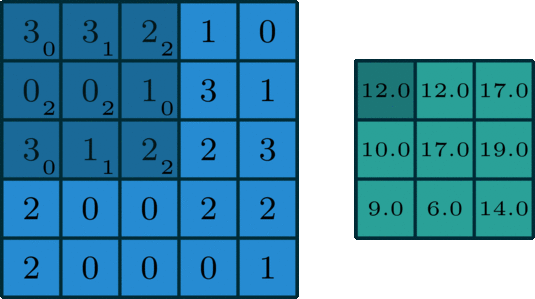

In [3]:
from IPython.display import Image
Image(filename="img/conv_normal.gif")

- Divide el input (3D tensor) en parches y aplica la operación convolución (la misma en cada capa) a cada parche

- Output (3D tensor) es un mapa de features o **mapa de activaciones** (cada una el resultado de aplicar la transformacion). Dicho mapa tendra dimensiones **Height x Width x Nº filtros**. Cada capa del volumen (eje z) es el resultado de aplicar un filtro a cada parche del input.

- La convolución desliza cada parche sobre el input, parando en cada posible posicion y aplicando la transformacion (función kernel)

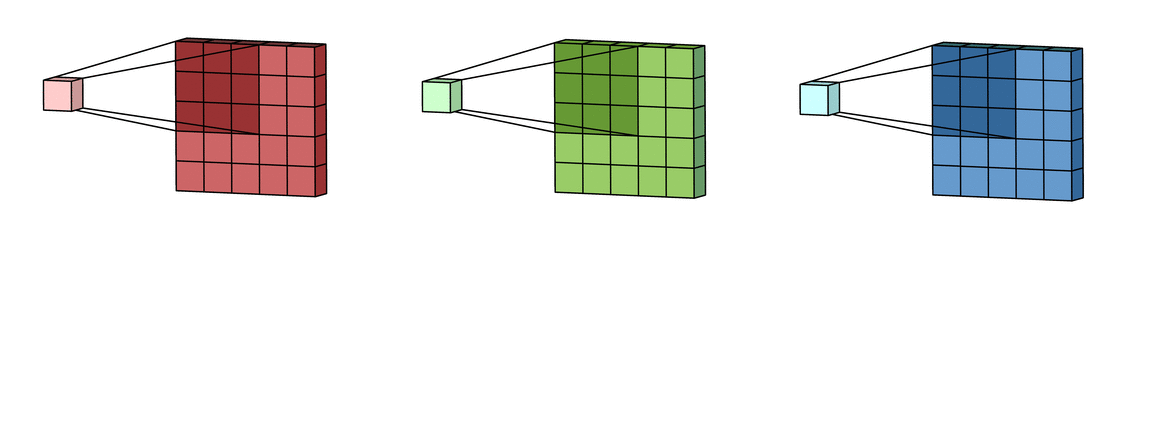

In [6]:
Image(filename="img/conv_multichannel.gif")

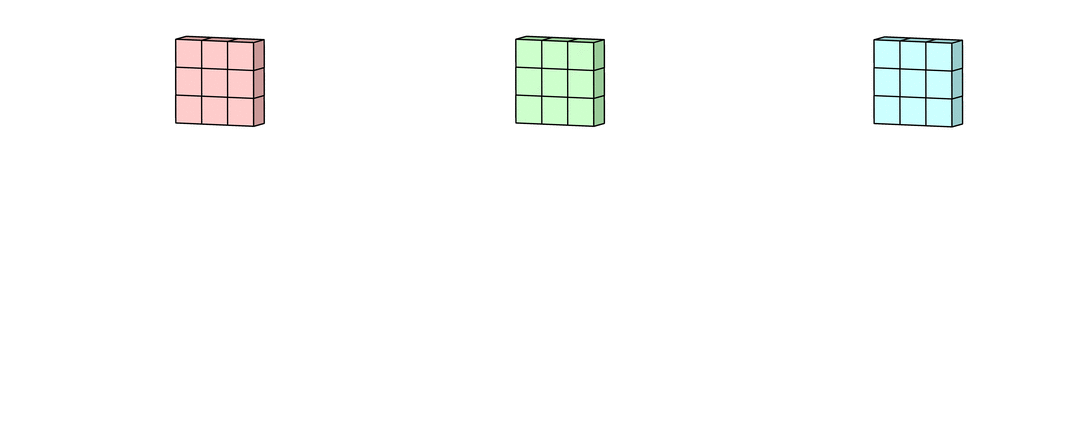

In [7]:
Image(filename="img/conv_multichannel_2.gif")

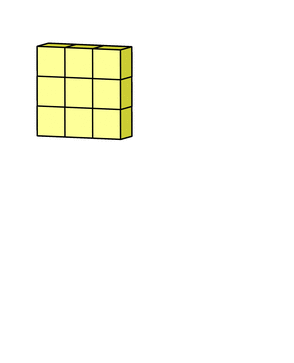

In [8]:
Image(filename="img/bias_cnn.gif")

### Padding 
- Sólo hay 9 formas de aplicar un parche 3x3 a un imagen de 5x5.
- Si se quiere aplicar a todos los pixeles --> **padding** (añadir filas y columnas para hacerlo posible)

Así, el **padding** consiste simplemente en agregar pixeles con valor igual a cero a los bordes de la imagen original, tal y cómo se muestra en la siguiente imagen.

```python
Conv2D(...,padding=<valor>): 'valid' sin padding, 'same' para igualar tamaño input y output feature 
```

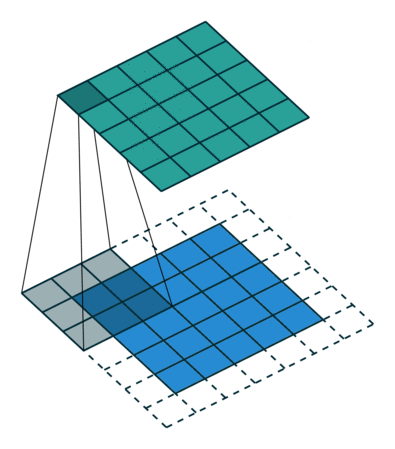

In [9]:
Image(filename="img/conv_padding.gif")

### Striding ##

En la convolución original, el kernel se desplaza un pixel hacia la derecha, o hacia abajo, durante cada iteración. Cada uno de estos desplazamientos se conoce como stride (o salto), y en la convolución original este valor es igual a 1, aunque también es posible realizar la convolución con strides mayores, lo que permite obtener imágenes resultantes de menor tamaño en comparación con las obtenidas en la convolución original

- El **Stride**, por tanto, determina el salto entre ventana y ventana

```python
Conv2D(...,stride=<valor>): int, salto entre ventanas 
```

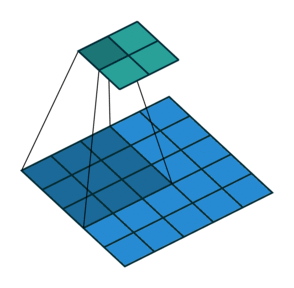

In [12]:
Image(filename="img/conv_stride.gif")

### Pooling
- Se usan para hacer **downsampling del input feature (conjunto inicial de entrada)** (reducir dimensionalidad espacial)
- Similar a convoluciones, pero no aplican un kernel sino que aplican **funcion 'max' (o average)**
- Por defecto, tamaño 2x2 y stride 2

In [10]:
# red sin pooling

from tensorflow.keras import models
from tensorflow.keras import layers

convnet_nopooling = models.Sequential()
convnet_nopooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Flatten())
convnet_nopooling.add(layers.Dense(512,activation='relu'))
convnet_nopooling.add(layers.Dense(10,activation='softmax'))

convnet_nopooling.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,945,578 (72.27 MB)

 Trainable params: 18,945,578 (72.27 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Red con pooling
convnet_pooling = models.Sequential()

########################## BASE MODEL ###### ENCARGADO DE EXTRAER CARACTERÍSTICAS AUTOMÁTICAMENTE
#BLOQUE CONVOLUCIONAL 1
convnet_pooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

#BLOQUE CONVOLUCIONAL 2
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

########################## TOP MODEL ###### ENCARGADO LLEVAR A CABO LA CLASIFICACIÓN
convnet_pooling.add(layers.Flatten())
convnet_pooling.add(layers.Dense(512,activation='relu'))
convnet_pooling.add(layers.Dense(10,activation='softmax'))

convnet_pooling.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

# EJEMPLO PRÁCTICO
## MODELO RED NEURONAL CONVOLUCIONAL

Usaremos el dataset de imágenes de flores ("flowers") que dispone de 5 clases distintas de flores y que forma parte de los datasets de tensorflow.

Previamente haremos un preprocesamiento para estandarizar todas las imágenes en un tamaño único. De igual modo, las imágenes tienen tres canales de color (rojo, verde y azul).

### 1. IMPORTAMOS LIBRERÍAS

In [15]:
# IMPORTAMOS LIBRERIAS
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

### 2. DESCARGAMOS DATASET "Flowers"

Los parámetros *as_supervised*, *with_info* descargan información y metadatos adicionales retornando dos valores que se almacenan en las variables datos y metadatos:

In [16]:
datos, metadatos = tfds.load("tf_flowers", as_supervised=True, with_info=True)

2025-03-06 19:37:46.737089: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


### 3. ANÁLISIS DEL DATASET

Se puede observar lo siguiente:

- Las imágenes tienen diferentes tamaños.
- Tienen tres canales de color (son imágenes a color).

2025-03-06 19:38:22.419989: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-06 19:38:22.451656: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-06 19:38:22.468804: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


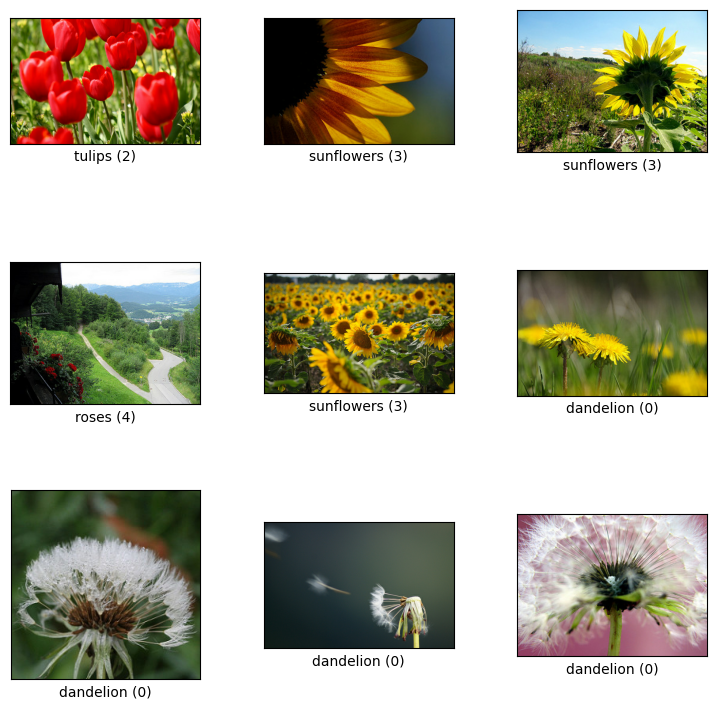

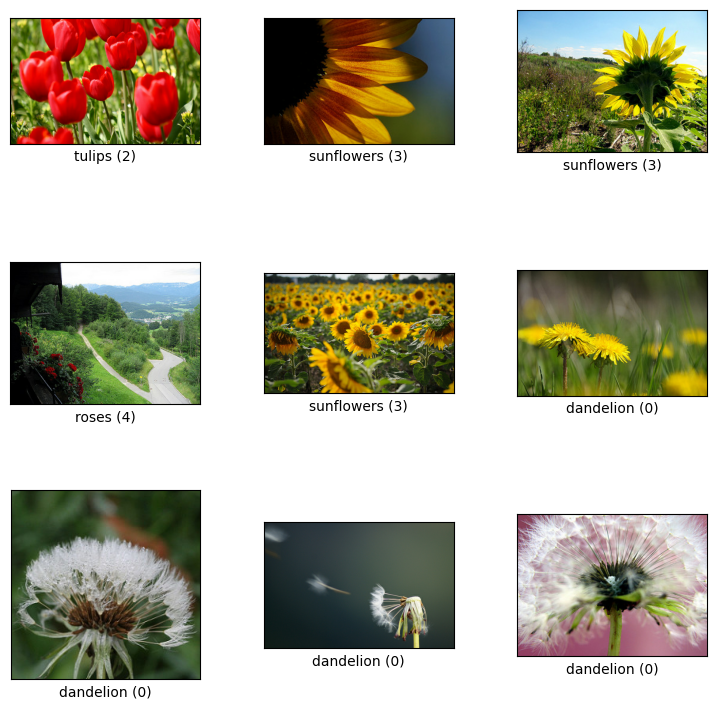

In [17]:
tfds.show_examples(datos["train"], metadatos)

### 4. PREPROCESADO DE DATOS (SOBRE UNA MUESTRA REDUCIDA)

A modo de ejemplo se realiza el preprocesado de solo 20 imágenes. En base a lo visto en el paso 3, haremos los siguiente:

- Se redimensionan las imágenes a 100x100 px, reduciendo e igualando su tamaño (así se disminuye el número de neuronas en la capa de entrada y el tiempo de entrenamiento).
- Pasaremos de color a imágenes en escala de grises (se reduce así el procesamiento).

2025-03-06 19:40:02.536111: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


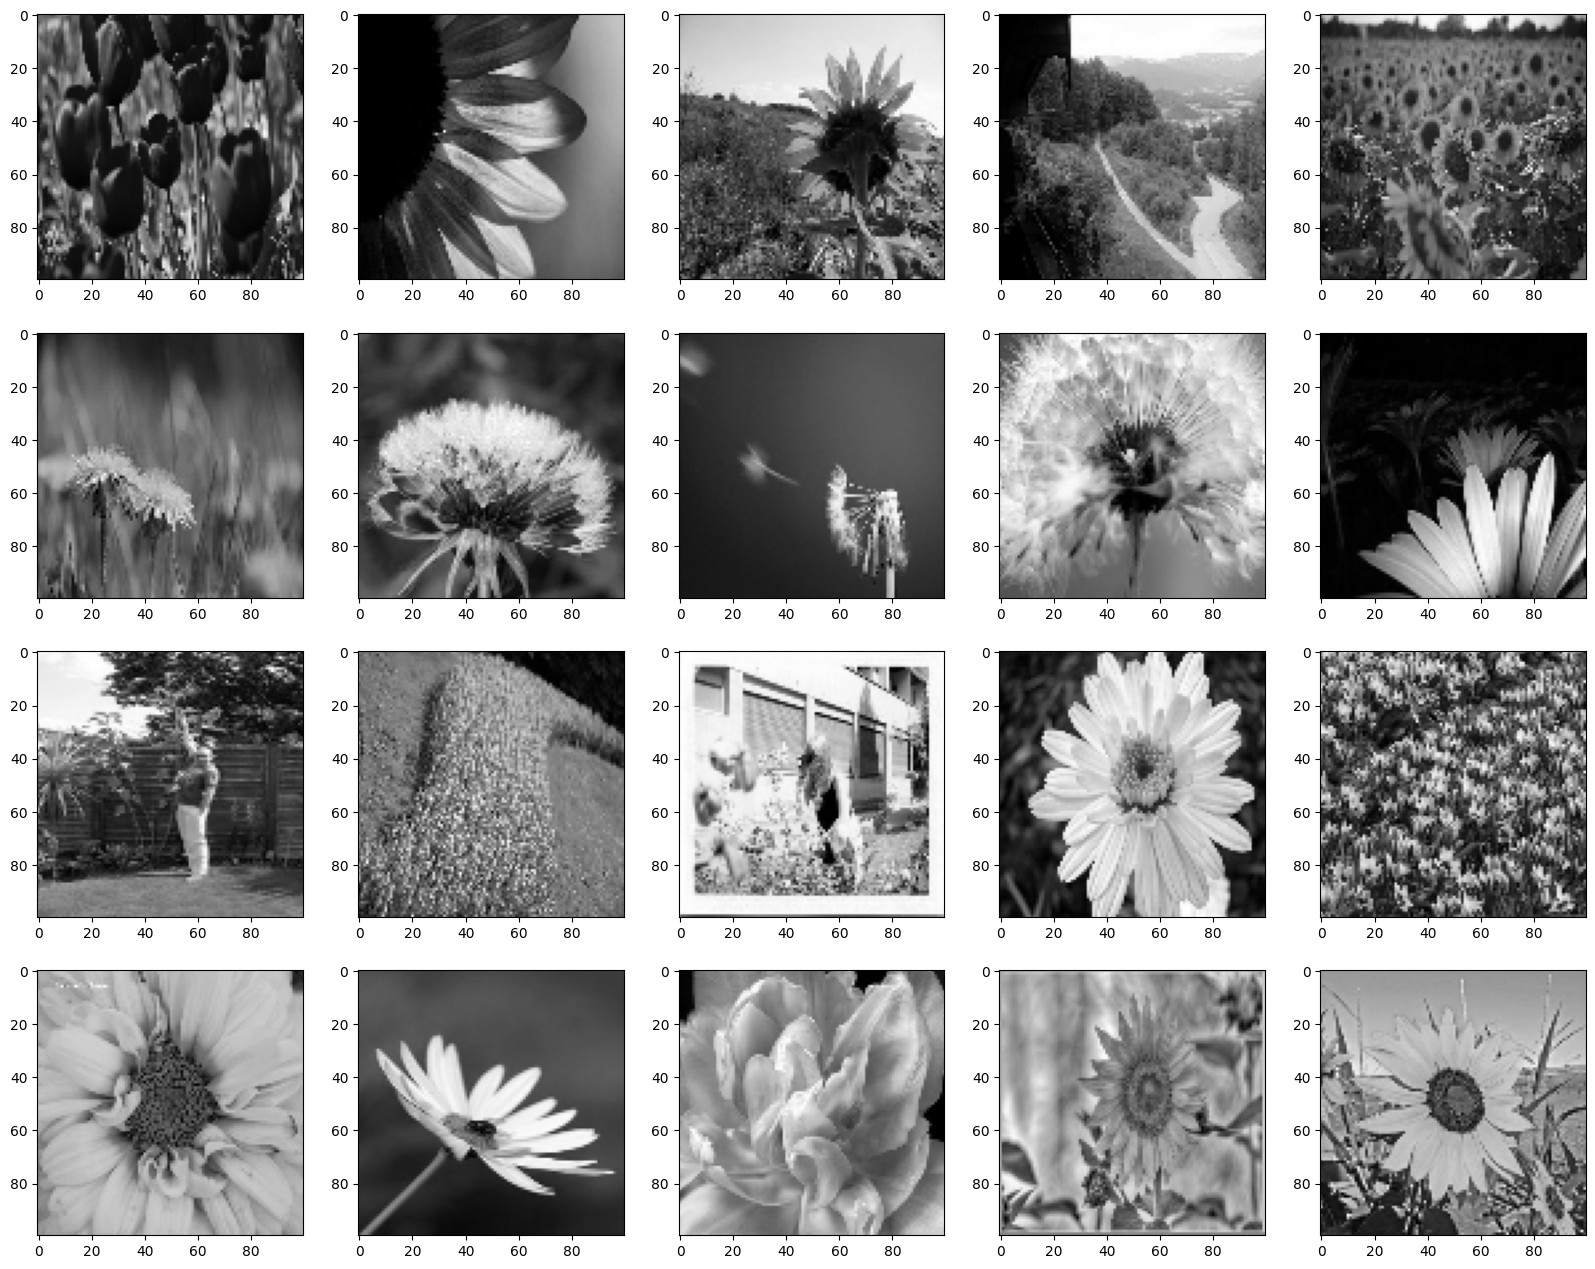

In [19]:
plt.figure(figsize=(20,20))

TAMANO_IMG=100

# redimensionamos solo a 20 imágenes
for i, (imagen, etiqueta) in enumerate(datos["train"].take(20)):
  # a. Redimensionamos las imágenes a 100x100 píxeles:
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

Comprobamos el número de clases que tiene el dataset

In [20]:
num_classes = metadatos.features['label'].num_classes
print(num_classes)

5


Creamos una lista el cual almacenará todo el conjunto de imágenes.

In [21]:
datos_entrenamiento = []

### 5. PREPROCESADO DE TODAS LAS IMÁGENES

In [22]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # 1 canal de color.

  # datos_entrenamiento: lista que almacenará listas de dos posiciones (los pixeles
  # de la imágen y su etiqueta)
  datos_entrenamiento.append([imagen, etiqueta])

2025-03-06 19:40:25.867711: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
#datos_entrenamiento ahora contiene las 3670 imágenes preprocesadas
len(datos_entrenamiento)

3670

### 6. SEPARCIÓN DE CONJUNTOS DE ENTRENAMIENTO

In [24]:
X = []
y = []

# Iteramos todos los datos de entrenamiento y lo agregamos en X (imagen), y (etiqueta):
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

### 7. NORMALIZACIÓN DE IMÁGENES

Se divide cada píxel entre 255, para discretizar los valores de cada píxel dentro del rango [0, 1]

In [25]:
X = np.array(X).astype(float) / 255

# Pasamos a "y" en un arreglo de numpay
y = np.array(y)

### 8. DISEÑO ARQUITECTURA MODELO RED NEURONAL CONVOLUCIONAL - CNN

Se mezclan las capas convolucionales, densas y de aplanado/agrupación, así como las de *pooling* que aportan reducción de dimensionalidad

In [26]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

Dado que se trata de una clasificación multiclase, usamos como función de pérdida la **SparseCategoricalCrossentropy** y el optimizador **Adam**

In [27]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #usamos esta pérdida porque es multiclase
    metrics=["accuracy"]
)

Pasamos a entrenar el modelo. Dentro de los parámetros que se pueden definir en este paso, está el que hace referencia al número de muestra/elementos que son evaluadas antes de que los pesos sean actualizados en la red neuronal y que se denomina *batch_size*. Si este parámetro tiene un valor pequeño, se provoca que la red tenga poca cantidad de datos en memoria y, en teoría, su entrenamiento sea más rápido.

In [28]:
train_log = modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=15
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2864 - loss: 1.5656 - val_accuracy: 0.3406 - val_loss: 1.4754
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4210 - loss: 1.3904 - val_accuracy: 0.3815 - val_loss: 1.5118
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4834 - loss: 1.2750 - val_accuracy: 0.4728 - val_loss: 1.2997
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5582 - loss: 1.1475 - val_accuracy: 0.4973 - val_loss: 1.2383
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6164 - loss: 0.9903 - val_accuracy: 0.5395 - val_loss: 1.1523
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6624 - loss: 0.8802 - val_accuracy: 0.5613 - val_loss: 1.1318
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7196 - loss: 0.7546 - val_accuracy: 0.5286 - val_loss: 1.2061
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7651 - loss: 0.6340 - val_accuracy: 0.5531 - v

Por último, evaluamos el modelo para comprobar su eficiencia

In [29]:
modelo.evaluate(X, y, batch_size=32)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9873 - loss: 0.0724


[0.4470486342906952, 0.9076294302940369]

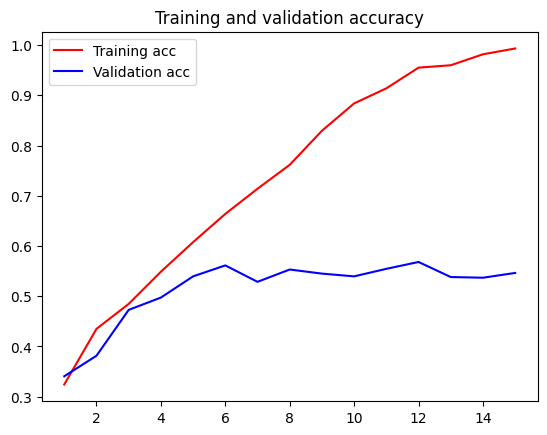

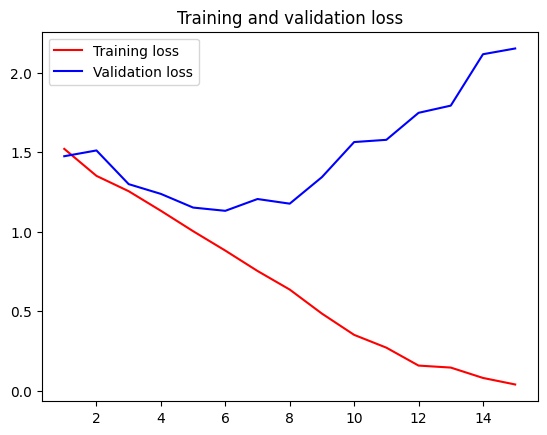

In [30]:
import matplotlib.pyplot as plt
 
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

En la segunda gráfica observamos que hay un problema. La red neuronal comienza a tener problemas con el conjunto de validación y se observa como la función de coste crece en vez de minimizarse. Es un claro problema de overfitting. 
Vamos a recurrir a una técnica habitual en estos casos, que consiste en eliminar complejidad de la red. Al disminuir esta, conseguimos que se simplifique el modelo y que logre generalizar mejor. 
Una forma de reducir esta complejidad es eliminar algunas conexiones de forma aleatoria entre dos capas. Esto se puede hacer con una capa *Dropout()*. Como parámetro se pasa el porcentaje de conexiones que se desea anular (por ejemplo un valor de 0.25 eliminará el 25% de las conexiones).

In [51]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),

    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(num_classes)
])

In [52]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #usamos esta pérdida porque es multiclase
    metrics=["accuracy"]
)

In [53]:
train_log = modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=15
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2376 - loss: 1.6418 - val_accuracy: 0.2861 - val_loss: 1.5722
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2958 - loss: 1.5319 - val_accuracy: 0.3256 - val_loss: 1.5099
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3761 - loss: 1.4611 - val_accuracy: 0.3692 - val_loss: 1.4505
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3997 - loss: 1.4133 - val_accuracy: 0.3787 - val_loss: 1.4484
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4038 - loss: 1.3705 - val_accuracy: 0.4346 - val_loss: 1.3753
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4938 - loss: 1.2538 - val_accuracy: 0.4510 - val_loss: 1.3090
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5261 - loss: 1.1759 - val_accuracy: 0.5109 - val_loss: 1.2463
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5489 - loss: 1.1020 - val_accuracy: 0.4973 - v

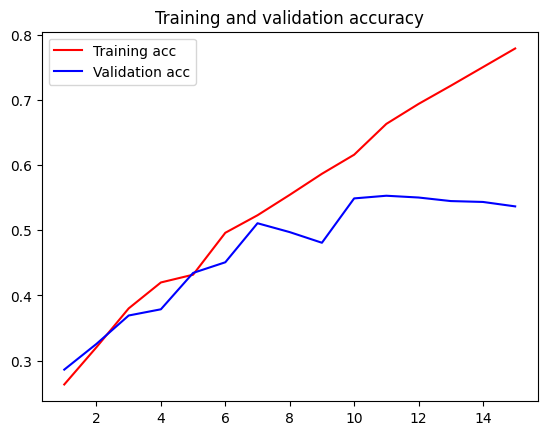

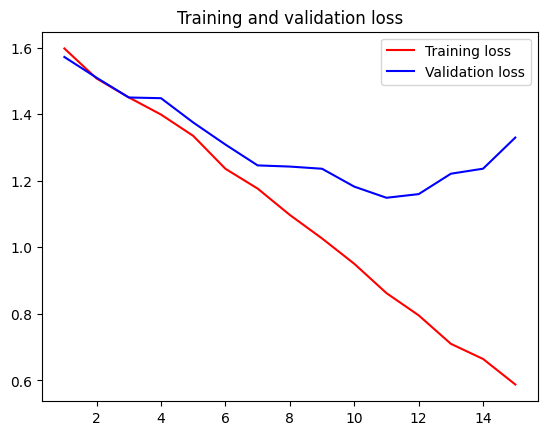

In [55]:
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Como vemos, ahora la cosa está algo mejor, aunque sigue sin conseguir afinarse del todo. 
Puede observarse que el proceso de ajuste de este tipo de modelos requiere grandes dosis de paciencia y de repetición del experimento.